# LIBRARIES


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


# CASE 1


## About the CASE 1:

### .The series is composed by TFP (rtfpna variable) at constant national prices (2005 = 1) for three countries: United States (USA), Canada (CAN) and Mexico (MEX).

### The CSV File have with variables:
###  1. isocode (CATEGORICAL)
###  2. year (integer)
###  3. rtfpna (numeric) variable responsable for total factor productivity at constant national prices

In [4]:
data = pd.read_csv("../data/TFP.csv")
data

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


In [5]:
#cheking the data type

data.dtypes

isocode     object
year         int64
rtfpna     float64
dtype: object

In [6]:
data.shape

(186, 3)

In [7]:
print(data.isnull().sum())

isocode    0
year       0
rtfpna     0
dtype: int64


In [8]:
print(data['rtfpna'].describe())

count    186.000000
mean       0.975614
std        0.177538
min        0.617148
25%        0.855143
50%        0.995047
75%        1.046348
max        1.383718
Name: rtfpna, dtype: float64


In [9]:
data.loc[(data['isocode'] == 'USA')]

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
57,USA,2007,1.006595
58,USA,2008,0.998499
59,USA,2009,0.986738
60,USA,2010,1.009463


Text(0.5, 1.0, 'MEX')

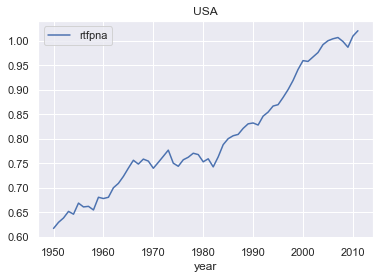

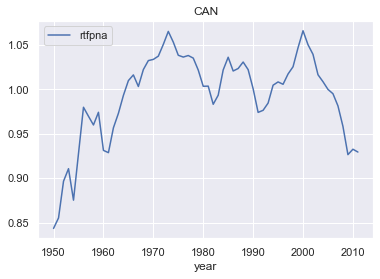

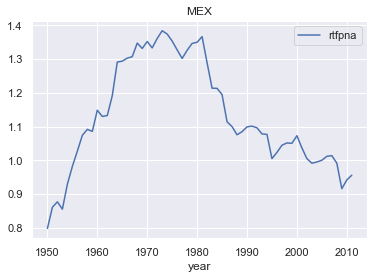

In [10]:
data.loc[(data['isocode'] == 'USA')].plot(x='year', y='rtfpna')
plt.title("USA")

data.loc[(data['isocode'] == 'CAN')].plot(x='year', y='rtfpna')
plt.title("CAN")

data.loc[(data['isocode'] == 'MEX')].plot(x='year', y='rtfpna')
plt.title("MEX")

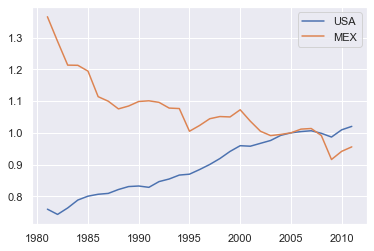

In [11]:
data2 = data.set_index('isocode')

ax = plt.subplot(111)

year80country = data2.loc[['USA', 'MEX']]

rtfpnausa = year80country.query('year > 1980 & isocode == "USA"')
rtfpnamex = year80country.query('year > 1980 & isocode == "MEX"')

ax.plot(rtfpnausa['year'], rtfpnausa['rtfpna'], label='USA')
ax.plot(rtfpnamex['year'], rtfpnamex['rtfpna'], label='MEX')
ax.legend()

plt.show()

#the question here is what happen in > 1980
# because USA start to grown and MEX start to fall

In [12]:
minvalue = data.loc[(data['isocode'] == 'USA')]

minvaluenew = minvalue.query('year > 1980')

min(minvaluenew['rtfpna'])

0.7426289916038513

# USA PART

In [13]:
datausa = data.loc[(data['isocode'] == 'USA')]

datausa
datausa.set_index('year', inplace=True)
datausa.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year')

In [14]:
ts = datausa['rtfpna']
ts.head()

year
1950    0.617148
1951    0.629588
1952    0.638451
1953    0.651858
1954    0.646179
Name: rtfpna, dtype: float64

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

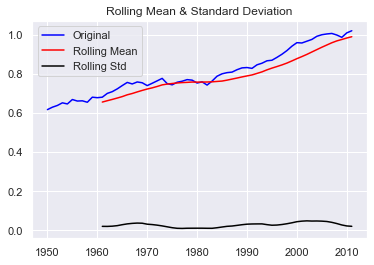

Results of Dickey-Fuller Test:
Test Statistic                  0.223647
p-value                         0.973557
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [16]:
test_stationarity(ts)

# Trend


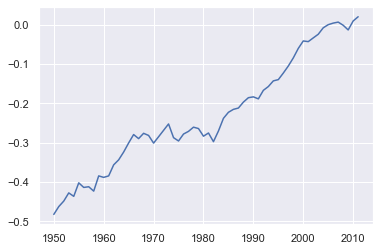

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

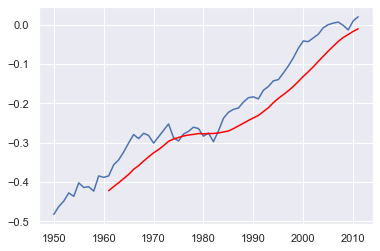

In [18]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()


plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

year
1950         NaN
1951         NaN
1952         NaN
1953         NaN
1954         NaN
1955         NaN
1956         NaN
1957         NaN
1958         NaN
1959         NaN
1960         NaN
1961    0.037717
Name: rtfpna, dtype: float64

In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

year
1961    0.037717
1962    0.055279
1963    0.058104
1964    0.067566
1965    0.080071
Name: rtfpna, dtype: float64

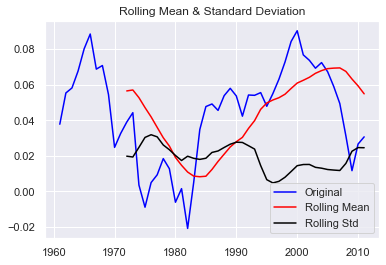

Results of Dickey-Fuller Test:
Test Statistic                 -2.135564
p-value                         0.230457
#Lags Used                      1.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [21]:
test_stationarity(ts_log_moving_avg_diff)

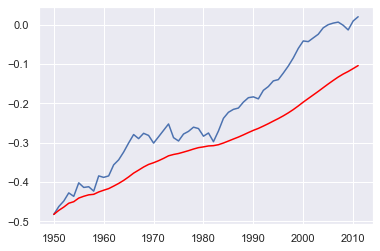

In [22]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

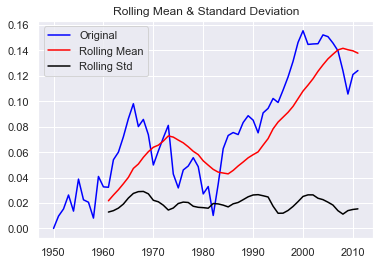

Results of Dickey-Fuller Test:
Test Statistic                 -1.600333
p-value                         0.483426
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


## Forecasting a time series

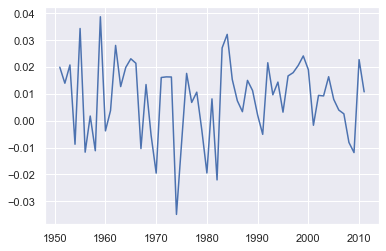

In [24]:
#take first difference
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

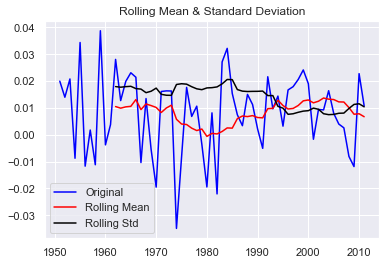

Results of Dickey-Fuller Test:
Test Statistic                -7.874008e+00
p-value                        4.898898e-12
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [27]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


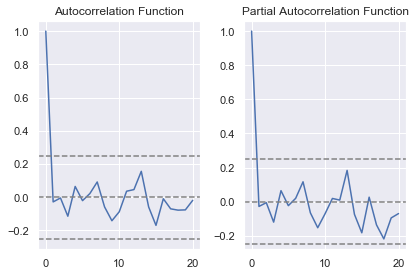

In [28]:
from statsmodels.tsa.arima_model import ARIMA
#ACF AND PACF PLOTS:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

# AR Model

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0130')

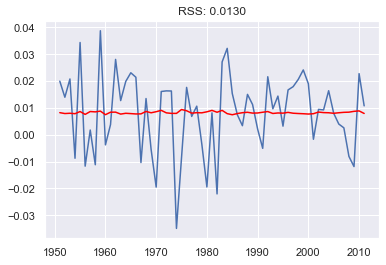

In [29]:
#MA model:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

# ARIMA MODEL

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: 0.0126')

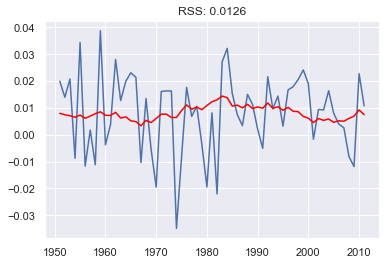

In [30]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

# MA Model

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0130')

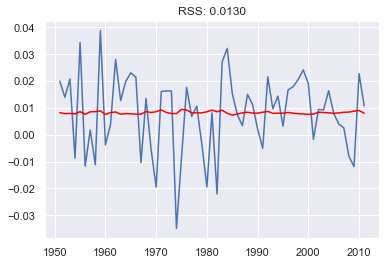

In [31]:
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

### ARIMA HAS THE BEST RSS VALUES

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy =True)
print(predictions_ARIMA_diff.head())

year
1951    0.007995
1952    0.007435
1953    0.007091
1954    0.006514
1955    0.007352
dtype: float64


In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

year
1951    0.007995
1952    0.015430
1953    0.022521
1954    0.029035
1955    0.036387
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1950   -0.482647
1951   -0.454694
1952   -0.433280
1953   -0.405408
1954   -0.407643
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.3268')

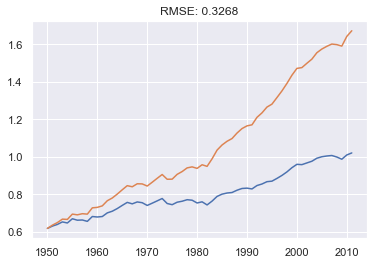

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# MEX PART

In [36]:
datamex = data.loc[(data['isocode'] == 'MEX')]

datamex
datamex.set_index('year', inplace=True)
datamex.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year')

In [37]:
ts_mex = datamex['rtfpna']
ts_mex.head()

year
1950    0.798159
1951    0.860931
1952    0.876968
1953    0.855204
1954    0.929168
Name: rtfpna, dtype: float64

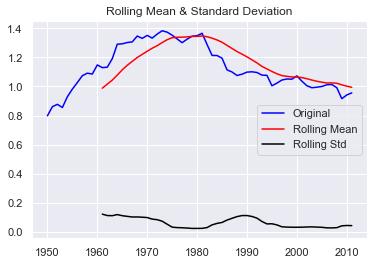

Results of Dickey-Fuller Test:
Test Statistic                 -1.940444
p-value                         0.313281
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [38]:
test_stationarity(ts_mex)

# TREND

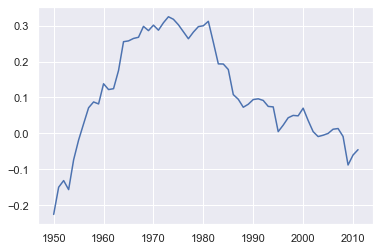

In [40]:
tsmex_log = np.log(ts_mex)
plt.plot(tsmex_log)

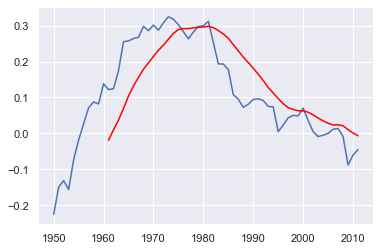

In [41]:
moving_avg_mex = pd.Series(tsmex_log).rolling(window=12).mean()


plt.plot(tsmex_log)
plt.plot(moving_avg_mex, color='red')

In [42]:
tsmex_log_moving_avg_diff = tsmex_log - moving_avg_mex
tsmex_log_moving_avg_diff.head(12)

year
1950         NaN
1951         NaN
1952         NaN
1953         NaN
1954         NaN
1955         NaN
1956         NaN
1957         NaN
1958         NaN
1959         NaN
1960         NaN
1961    0.140926
Name: rtfpna, dtype: float64

In [43]:
tsmex_log_moving_avg_diff.dropna(inplace=True)
tsmex_log_moving_avg_diff.head()

year
1961    0.140926
1962    0.114253
1963    0.137783
1964    0.185738
1965    0.153447
Name: rtfpna, dtype: float64

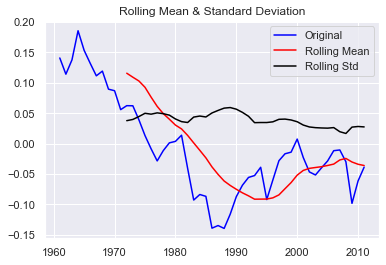

Results of Dickey-Fuller Test:
Test Statistic                 -1.855342
p-value                         0.353352
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [44]:
test_stationarity(tsmex_log_moving_avg_diff)

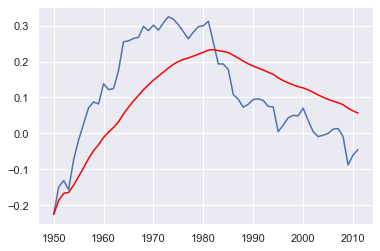

In [45]:
expwighted_avg_mex = tsmex_log.ewm(halflife=12).mean()
plt.plot(tsmex_log)
plt.plot(expwighted_avg_mex, color='red')

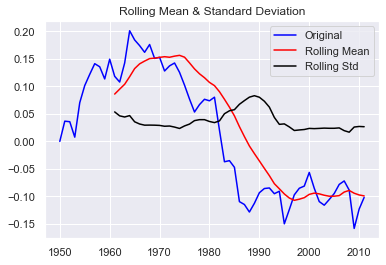

Results of Dickey-Fuller Test:
Test Statistic                 -0.688078
p-value                         0.849813
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [46]:
tsmex_log_ewma_diff = tsmex_log - expwighted_avg_mex
test_stationarity(tsmex_log_ewma_diff)

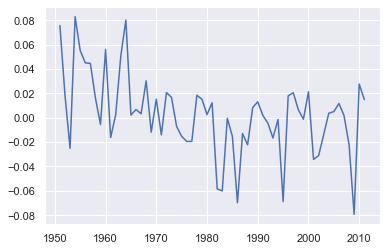

In [47]:
#take first difference
tsmex_log_diff = tsmex_log - tsmex_log.shift()
plt.plot(tsmex_log_diff)

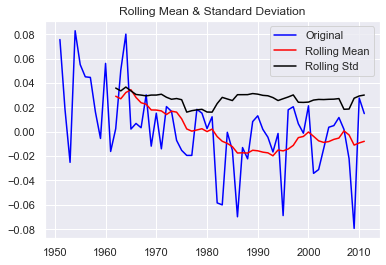

Results of Dickey-Fuller Test:
Test Statistic                -6.156537e+00
p-value                        7.345386e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [48]:
tsmex_log_diff.dropna(inplace=True)
test_stationarity(tsmex_log_diff)

## Forecasting a time series

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


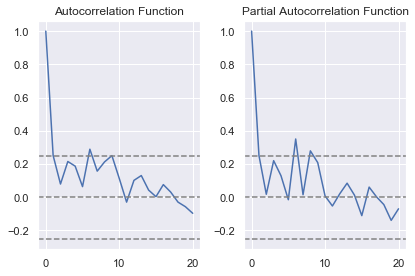

In [49]:
from statsmodels.tsa.arima_model import ARIMA
#ACF AND PACF PLOTS:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(tsmex_log_diff, nlags=20)
lag_pacf = pacf(tsmex_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsmex_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsmex_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsmex_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsmex_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

## AR Model


/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0622')

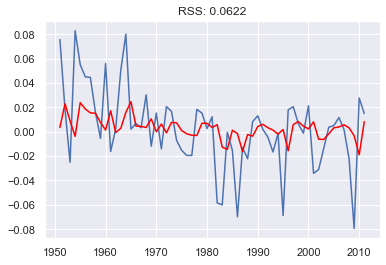

In [55]:
#MA model:
model = ARIMA(tsmex_log, order=(2,1,0))
results_AR_mex = model.fit(disp=-1)
plt.plot(tsmex_log_diff)
plt.plot(results_AR_mex.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_mex.fittedvalues - tsmex_log_diff)**2))

## ARIMA MODEL

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0561')

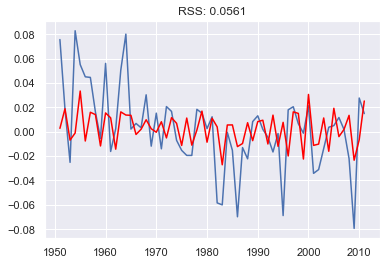

In [56]:
model = ARIMA(tsmex_log, order=(2,1,2))
results_ARIMA_mex = model.fit(disp=-1)
plt.plot(tsmex_log_diff)
plt.plot(results_ARIMA_mex.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA_mex.fittedvalues - tsmex_log_diff)**2))

# MA Model

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0623')

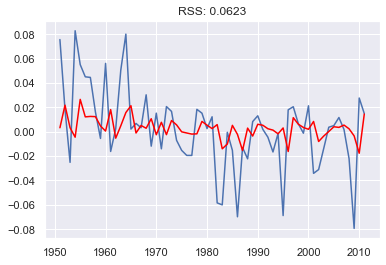

In [57]:
model = ARIMA(tsmex_log, order=(0,1,2))
results_MA_mex = model.fit(disp=-1)
plt.plot(tsmex_log_diff)
plt.plot(results_MA_mex.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA_mex.fittedvalues - tsmex_log_diff)**2))

### ARIMA HAS THE BEST RSS VALUES

In [58]:
predictions_ARIMA_diff_mex = pd.Series(results_ARIMA_mex.fittedvalues, copy =True)
print(predictions_ARIMA_diff_mex.head())

year
1951    0.002791
1952    0.018903
1953   -0.006890
1954   -0.001035
1955    0.033430
dtype: float64


In [59]:
predictions_ARIMA_diff_cumsum_mex = predictions_ARIMA_diff_mex.cumsum()
print(predictions_ARIMA_diff_cumsum_mex.head())

year
1951    0.002791
1952    0.021694
1953    0.014805
1954    0.013769
1955    0.047199
dtype: float64


In [61]:
predictions_ARIMA_log_mex = pd.Series(tsmex_log, index=tsmex_log.index)
predictions_ARIMA_log_mex = predictions_ARIMA_log_mex.add(predictions_ARIMA_diff_cumsum_mex,fill_value=0)
predictions_ARIMA_log_mex.head()

year
1950   -0.225447
1951   -0.146949
1952   -0.109591
1953   -0.141610
1954   -0.059697
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.1559')

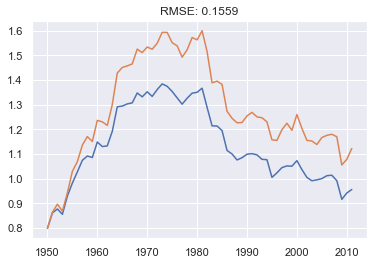

In [89]:
predictions_ARIMA_mex = np.exp(predictions_ARIMA_log_mex)
plt.plot(ts_mex)
plt.plot(predictions_ARIMA_mex)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_mex-ts_mex)**2)/len(ts_mex)))

# CANADA PART

In [64]:
datacan = data.loc[(data['isocode'] == 'CAN')]

datacan.set_index('year', inplace=True)
datacan.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year')

In [65]:
ts_can = datacan['rtfpna']
ts_can.head()

year
1950    0.843335
1951    0.855123
1952    0.896489
1953    0.910658
1954    0.875178
Name: rtfpna, dtype: float64

In [66]:
ts_can = datacan['rtfpna']
ts_can.head()

year
1950    0.843335
1951    0.855123
1952    0.896489
1953    0.910658
1954    0.875178
Name: rtfpna, dtype: float64

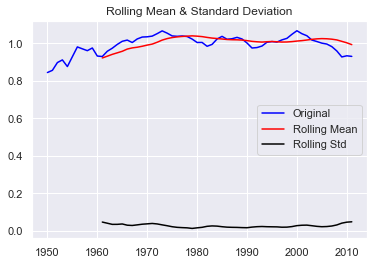

Results of Dickey-Fuller Test:
Test Statistic                 -3.027753
p-value                         0.032383
#Lags Used                      1.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [69]:
test_stationarity(ts_can)

# Trend

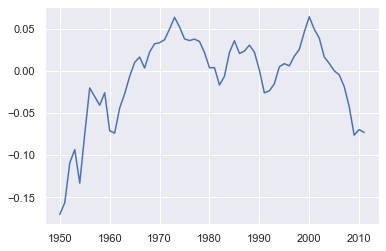

In [70]:
tscan_log = np.log(ts_can)
plt.plot(tscan_log)

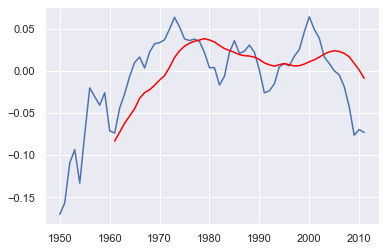

In [71]:
moving_avg_can = pd.Series(tscan_log).rolling(window=12).mean()


plt.plot(tscan_log)
plt.plot(moving_avg_can, color='red')

In [72]:
tscan_log_moving_avg_diff = tscan_log - moving_avg_can
tscan_log_moving_avg_diff.head(12)

year
1950        NaN
1951        NaN
1952        NaN
1953        NaN
1954        NaN
1955        NaN
1956        NaN
1957        NaN
1958        NaN
1959        NaN
1960        NaN
1961    0.00949
Name: rtfpna, dtype: float64

In [73]:
tscan_log_moving_avg_diff.dropna(inplace=True)
tscan_log_moving_avg_diff.head()

year
1961    0.009490
1962    0.028686
1963    0.034834
1964    0.046830
1965    0.054876
Name: rtfpna, dtype: float64

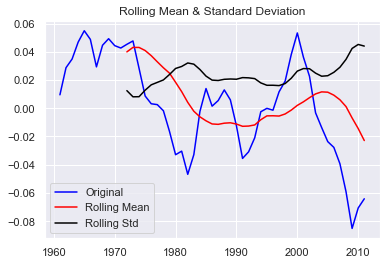

Results of Dickey-Fuller Test:
Test Statistic                 -1.922619
p-value                         0.321496
#Lags Used                      1.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [74]:
test_stationarity(tscan_log_moving_avg_diff)

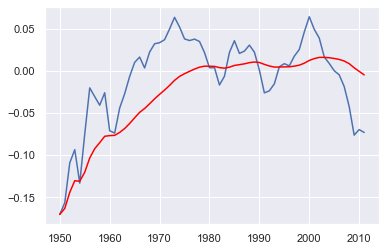

In [75]:
expwighted_avg_can = tscan_log.ewm(halflife=12).mean()
plt.plot(tscan_log)
plt.plot(expwighted_avg_can, color='red')

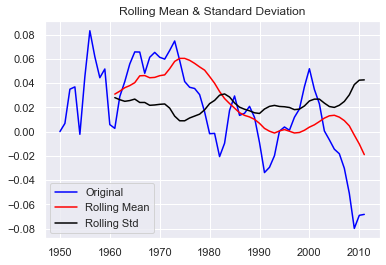

Results of Dickey-Fuller Test:
Test Statistic                 -0.681585
p-value                         0.851462
#Lags Used                      2.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [76]:
tscan_log_ewma_diff = tscan_log - expwighted_avg_can
test_stationarity(tscan_log_ewma_diff)

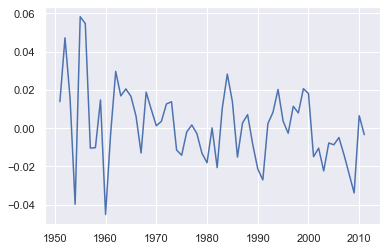

In [77]:
#take first difference
tscan_log_diff = tscan_log - tscan_log.shift()
plt.plot(tscan_log_diff)

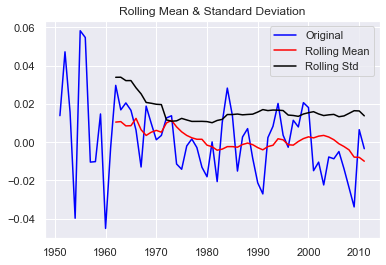

Results of Dickey-Fuller Test:
Test Statistic                -6.178795e+00
p-value                        6.531346e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [78]:
tscan_log_diff.dropna(inplace=True)
test_stationarity(tscan_log_diff)

## Forecasting a time series

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


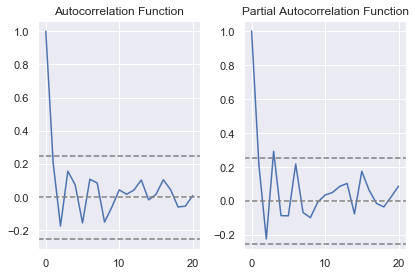

In [79]:
from statsmodels.tsa.arima_model import ARIMA
#ACF AND PACF PLOTS:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(tscan_log_diff, nlags=20)
lag_pacf = pacf(tscan_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tscan_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tscan_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tscan_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tscan_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

## AR Model


/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0220')

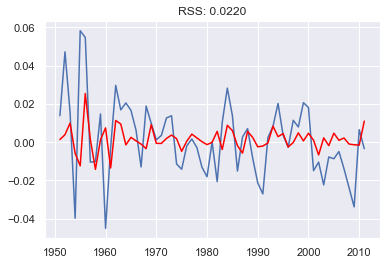

In [80]:
#MA model:
model = ARIMA(tscan_log, order=(2,1,0))
results_AR_can = model.fit(disp=-1)
plt.plot(tscan_log_diff)
plt.plot(results_AR_can.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_can.fittedvalues - tscan_log_diff)**2))

In [84]:
model = ARIMA(tscan_log, order=(2,1,2))
results_ARIMA_can = model.fit(disp=-1)
plt.plot(tscan_log_diff)
plt.plot(results_ARIMA_can.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA_can.fittedvalues - tscan_log_diff)**2))

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

## MA MODEL

/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rafaelandrade/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0212')

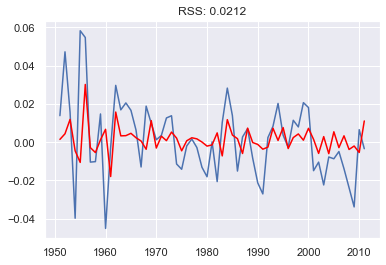

In [83]:
model = ARIMA(tscan_log, order=(0,1,2))
results_MA_can = model.fit(disp=-1)
plt.plot(tscan_log_diff)
plt.plot(results_MA_can.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA_can.fittedvalues - tscan_log_diff)**2))

### For canada the ARIMA doesn't work

In [85]:
predictions_ARIMA_diff_can = pd.Series(results_MA_can.fittedvalues, copy =True)
print(predictions_ARIMA_diff_can.head())

year
1951    0.001474
1952    0.004401
1953    0.011906
1954   -0.004497
1955   -0.010557
dtype: float64


In [86]:
predictions_ARIMA_diff_cumsum_can = predictions_ARIMA_diff_can.cumsum()
print(predictions_ARIMA_diff_cumsum_can.head())

year
1951    0.001474
1952    0.005874
1953    0.017781
1954    0.013284
1955    0.002727
dtype: float64


In [87]:
predictions_ARIMA_log_can = pd.Series(tscan_log, index=tscan_log.index)
predictions_ARIMA_log_can = predictions_ARIMA_log_can.add(predictions_ARIMA_diff_cumsum_can,fill_value=0)
predictions_ARIMA_log_can.head()

year
1950   -0.170391
1951   -0.155036
1952   -0.103395
1953   -0.075807
1954   -0.120045
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.1592')

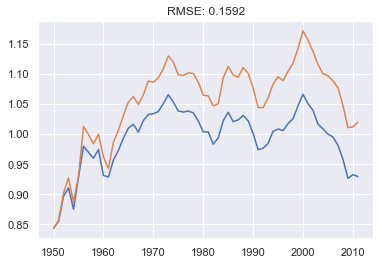

In [88]:
predictions_ARIMA_can = np.exp(predictions_ARIMA_log_can)
plt.plot(ts_can)
plt.plot(predictions_ARIMA_can)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_can-ts_mex)**2)/len(ts_can)))